**Recommender-System using Matrix-Factorization**

In this project, our goal is to recommend top 5 movies to a user, based on matrix-factorization, using
[MovieLens 20M](https://www.kaggle.com/grouplens/movielens-20m-dataset)
dataset.

Four steps are taken through this project
- Preprocess the data
- Data analysis
- Create model
- Predict user rating

**1- Preprocess:**

Since processing 20 million ratings takes a lot of time, we will use a subset of dataset. So our first step is to shrink data into a reasonable amount by choosing most common user and movies. Then, an id-correction is needed in order to fill dataset with identifiers starting from 0 to N-1. Finally, we will shuffle the data and divide dataset into training and test data.

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.utils import shuffle
import pickle
 
rating = pd.read_csv('drive/My Drive/MovieLens 20M/rating.csv')
movies = pd.read_csv('drive/My Drive/MovieLens 20M/movie.csv')
df = pd.merge(left=rating, right=movies, on='movieId')
 
print('Original dataframe:')
print('Number of ratings: ', len(df))
print('Number of unique users: ', df.userId.nunique())
print('Number of unique movies: ', df.movieId.nunique(), '\n')
 
# count of each user or movie occurred
usersHist = Counter(df.userId)
moviesHist = Counter(df.movieId)
 
# number of users and movies we would like to keep
n = 20000
m = 4000
 
# get array of most common users and movies, and shuffle the data
chosenUserIds = shuffle([chosenUsers for chosenUsers,count in usersHist.most_common(n)])
chosenMovieIds = shuffle([chosenMovies for chosenMovies,count in moviesHist.most_common(m)])
df = df[df.userId.isin(chosenUserIds) & df.movieId.isin(chosenMovieIds)].copy()
 
# Correct userId range
mapToNewUserId = {}
newId = 0
for oldId in chosenUserIds:
  mapToNewUserId[oldId] = newId
  newId += 1
 
# Correct movieId range
mapToNewMovieId = {}
newId = 0
for oldId in chosenMovieIds:
  mapToNewMovieId[oldId] = newId
  newId += 1
 
# assign newIDs to old dataframe
df.userId = df.apply(lambda row: mapToNewUserId[row.userId], axis=1)
df.movieId = df.apply(lambda row: mapToNewMovieId[row.movieId], axis=1)
df.drop(columns=['timestamp'], inplace=True)
df.sort_values(['userId', 'movieId'], inplace=True)
df = df[['userId', 'movieId', 'title', 'genres', 'rating']]
df.to_csv('drive/My Drive/MovieLens 20M/df.csv', index=False)
 
print('Shrinked dataframe:')
print('Number of ratings:', len(df))
print('Number of unique users:', df.userId.nunique())
print('Number of unique movies:', df.movieId.nunique(), '\n')
 
# split data into train and test
df = shuffle(df)
cutoff = int(0.8*len(df))
dfTrain = df.iloc[:cutoff]
dfTest = df.iloc[cutoff:]
 
# a dictionary to tell us which users have rated which movies
user2movie = {}
# a dicationary to tell us which movies have been rated by which users
movie2user = {}
# a dictionary to look up ratings in train data
usermovie2rating = {}
# a dictionary to look up ratings in test data
usermovie2rating_test = {}
 
# Create training data
print('Create training and test data in progress:')
currentRow = 0
def createData(row, mode):
  user = int(row.userId)
  movie = int(row.movieId)
 
  if mode == 'train':
    # {'user': [movie1, movie2, ..]}
    if user not in user2movie:
      user2movie[user] = [movie]
    else:
      user2movie[user].append(movie)
    # {'movie': [user1, user2, ..]}
    if movie not in movie2user:
      movie2user[movie] = [user]
    else:
      movie2user[movie].append(user)
    # {'(user,movie)': rating}
    usermovie2rating[(user,movie)] = row.rating
  else:
    usermovie2rating_test[(user,movie)] = row.rating
 
  global currentRow
  currentRow += 1
  if currentRow % 50000 == 0:
    print(round((currentRow/len(df))*100, 1), '%')
 
dfTrain.apply(lambda row: createData(row, 'train'), axis=1)
dfTest.apply(lambda row: createData(row, 'test'), axis=1)
 
# Save train and test data as JSON files
with open('drive/My Drive/MovieLens 20M/json/user2movie.json', 'wb') as f:
  pickle.dump(user2movie, f)
 
with open('drive/My Drive/MovieLens 20M/json/movie2user.json', 'wb') as f:
  pickle.dump(movie2user, f)
 
with open('drive/My Drive/MovieLens 20M/json/usermovie2rating.json', 'wb') as f:
  pickle.dump(usermovie2rating, f)
 
with open('drive/My Drive/MovieLens 20M/json/usermovie2rating_test.json', 'wb') as f:
  pickle.dump(usermovie2rating_test, f)
 
print('Training and test data saved successfully\n')
df = pd.read_csv('drive/My Drive/MovieLens 20M/df.csv')
df

Original dataframe:
Number of ratings:  20000263
Number of unique users:  138493
Number of unique movies:  26744 

Shrinked dataframe:
Number of ratings: 9721016
Number of unique users: 20000
Number of unique movies: 4000 

Create training and test data in progress:
0.5 %
1.0 %
1.5 %
2.1 %
2.6 %
3.1 %
3.6 %
4.1 %
4.6 %
5.1 %
5.7 %
6.2 %
6.7 %
7.2 %
7.7 %
8.2 %
8.7 %
9.3 %
9.8 %
10.3 %
10.8 %
11.3 %
11.8 %
12.3 %
12.9 %
13.4 %
13.9 %
14.4 %
14.9 %
15.4 %
15.9 %
16.5 %
17.0 %
17.5 %
18.0 %
18.5 %
19.0 %
19.5 %
20.1 %
20.6 %
21.1 %
21.6 %
22.1 %
22.6 %
23.1 %
23.7 %
24.2 %
24.7 %
25.2 %
25.7 %
26.2 %
26.7 %
27.3 %
27.8 %
28.3 %
28.8 %
29.3 %
29.8 %
30.3 %
30.9 %
31.4 %
31.9 %
32.4 %
32.9 %
33.4 %
33.9 %
34.5 %
35.0 %
35.5 %
36.0 %
36.5 %
37.0 %
37.5 %
38.1 %
38.6 %
39.1 %
39.6 %
40.1 %
40.6 %
41.1 %
41.7 %
42.2 %
42.7 %
43.2 %
43.7 %
44.2 %
44.7 %
45.3 %
45.8 %
46.3 %
46.8 %
47.3 %
47.8 %
48.3 %
48.9 %
49.4 %
49.9 %
50.4 %
50.9 %
51.4 %
51.9 %
52.5 %
53.0 %
53.5 %
54.0 %
54.5 %
55.0 %
55.

,userId,movieId,title,genres,rating
0,0,16,"Family Man, The (2000)",Comedy|Drama|Romance,5.0
1,0,20,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,4.5
2,0,26,Rush Hour (1998),Action|Comedy|Crime|Thriller,4.0
3,0,29,Serendipity (2001),Comedy|Romance,4.5
4,0,30,American Psycho (2000),Crime|Horror|Mystery|Thriller,0.5
...,...,...,...,...,...
9721011,19999,3955,"Last Emperor, The (1987)",Drama,5.0
9721012,19999,3959,Escape from Alcatraz (1979),Drama|Thriller,3.5
9721013,19999,3972,Witness (1985),Drama|Romance|Thriller,3.0
9721014,19999,3992,"Crow, The (1994)",Action|Crime|Fantasy|Thriller,2.5


**2- Data analysis**

A distribution of important data such as rating, movie genres and publication year of movies is plotted for better data understanding.

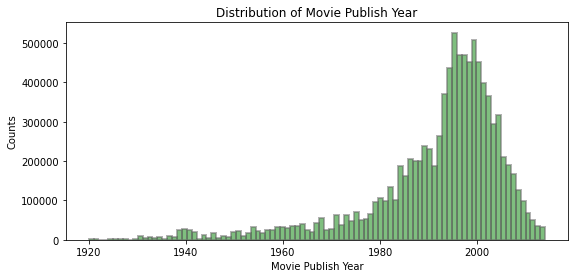

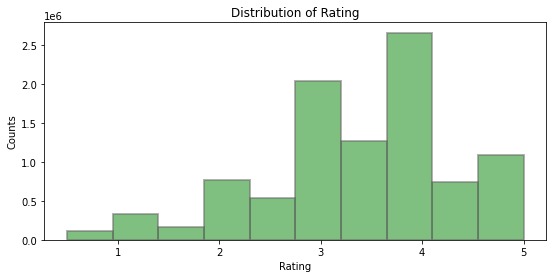

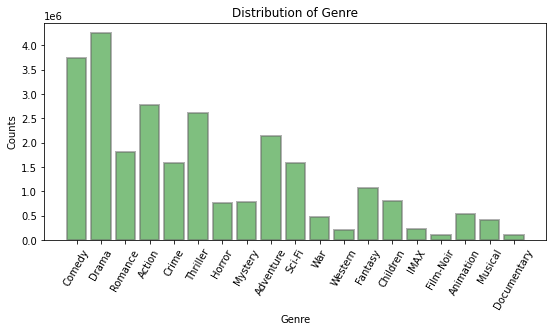

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
 
 
def histogram(data, xlabel='', hist=True, rotation=0):
  fig, ax = plt.subplots(figsize=(9, 4))
  fig.canvas.set_window_title(xlabel)
  ax.set_title('Distribution of ' + xlabel)
  ax.set_xlabel(xlabel)
  ax.set_ylabel('Counts')
  plt.xticks(rotation=rotation)
 
  if hist:
    plt.hist(data, bins=len(set(data)), color='green', alpha=0.5, ec='#666', linewidth=2)
  else:
    plt.bar(list(data.keys()), list(data.values()), color='green', alpha=0.5, ec='#666', linewidth=2)
  plt.show()
 
 
def plotYear(data):
  yearNotMentioned = 0
  years = []
  for title in data:
    publishYear = title[-5:-1]
    years.append(int(publishYear))
  histogram(years, xlabel='Movie Publish Year')
 
 
def plotRating(data):
  histogram(data, xlabel='Rating')
 
 
def plotGenre(data):
  genreList = {}
  for movieGenres in data:
    for genre in movieGenres.split('|'):
      if genre in genreList:
        genreList[genre] += 1
      else:
        genreList[genre] = 0
  histogram(genreList, xlabel='Genre', hist=False, rotation=60)
 
 
df = pd.read_csv('drive/My Drive/MovieLens 20M/df.csv')
plotYear(df.title)
plotRating(df.rating)
plotGenre(df.genres)

**3- Create model**

In this section, model will be created. Later we will plot results of loss function.

Users Count: 20000
Movies Count: 4000
---------------------------------
epoch: 0 

i: 0 usersCount: 20000
i: 2000 usersCount: 20000
i: 4000 usersCount: 20000
i: 6000 usersCount: 20000
i: 8000 usersCount: 20000
i: 10000 usersCount: 20000
i: 12000 usersCount: 20000
i: 14000 usersCount: 20000
i: 16000 usersCount: 20000
i: 18000 usersCount: 20000
updated W and b: 0:02:15.143997 

j: 0 moviesCount: 4000
j: 400 moviesCount: 4000
j: 800 moviesCount: 4000
j: 1200 moviesCount: 4000
j: 1600 moviesCount: 4000
j: 2000 moviesCount: 4000
j: 2400 moviesCount: 4000
j: 2800 moviesCount: 4000
j: 3200 moviesCount: 4000
j: 3600 moviesCount: 4000
updated U and c: 0:02:12.182836 

epoch duration: 0:04:27.327793
Calculate cost: 0:00:23.758334
Train Loss: 0.7556084326096466
Test Loss: 0.7935256293101476
---------------------------------
epoch: 1 

i: 0 usersCount: 20000
i: 2000 usersCount: 20000
i: 4000 usersCount: 20000
i: 6000 usersCount: 20000
i: 8000 usersCount: 20000
i: 10000 usersCount: 20000
i: 12000 u

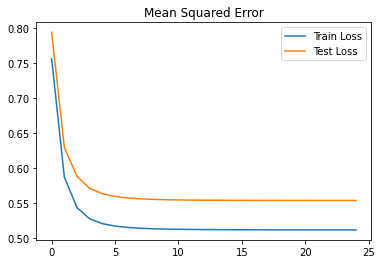

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime

# load in the data
with open('drive/My Drive/MovieLens 20M/json/user2movie.json', 'rb') as f:
  user2movie = pickle.load(f)

with open('drive/My Drive/MovieLens 20M/json/movie2user.json', 'rb') as f:
  movie2user = pickle.load(f)

with open('drive/My Drive/MovieLens 20M/json/usermovie2rating.json', 'rb') as f:
  usermovie2rating = pickle.load(f)

with open('drive/My Drive/MovieLens 20M/json/usermovie2rating_test.json', 'rb') as f:
  usermovie2rating_test = pickle.load(f)

# initialize number of users and movies
usersCount = len(user2movie)
moviesCount = len(movie2user)
print('Users Count:', usersCount)
print('Movies Count:', moviesCount)

# initialize variables
# k: latent factor
# W: user matrix,  b: user bias
# U: movie matrix, c: movie bias
# mu: mean of ratings
K = 10
W = np.random.randn(usersCount, K)
b = np.zeros(usersCount)
U = np.random.randn(moviesCount, K)
c = np.zeros(moviesCount)
mu = np.mean(list(usermovie2rating.values()))
trainLoss = []
testLoss = []
regularization = 0.02
epochs = 25

# calculate loss on test or training data
# data: (userId, movieId) -> rating
def MeanSquaredError(data): 
  N = float(len(data))
  sumSquareError = 0
  for usermovie, rating in data.items():
    user, movie = usermovie
    predictedRating = W[user].dot(U[movie]) + b[user] + c[movie] + mu
    # MSE (mean squared errors): 1/n sigma (r-r')^2
    # RMSE (root mean squared error): sqrt(MSE)
    # MAE (mean absolute error): 1/n sigma |r-r'|
    sumSquareError += (predictedRating - rating)*(predictedRating - rating)
  return sumSquareError / N


# learning algorithm
for epoch in range(epochs):
  print('---------------------------------')
  print('epoch:', epoch, '\n')
  epoch_start = datetime.now()
  # perform updates

  # ---------------------------------------------------
  # update W and b (user)
  t0 = datetime.now()
  for i in range(usersCount):
    # for W
    matrix = np.eye(K) * regularization
    vector = np.zeros(K)
    # for b
    bi = 0

    for j in user2movie[i]:
      r = usermovie2rating[(i,j)]
      matrix += np.outer(U[j], U[j])
      vector += (r - b[i] - c[j] - mu)*U[j]
      bi += (r - W[i].dot(U[j]) - c[j] - mu)

    # set the updates
    W[i] = np.linalg.solve(matrix, vector)
    b[i] = bi / (len(user2movie[i]) + regularization)

    if i % (usersCount//10) == 0:
      print("i:", i, "usersCount:", usersCount)
  print("updated W and b:", datetime.now() - t0, '\n')

  # ---------------------------------------------------
  # update U and c (movie)
  t0 = datetime.now()
  for j in range(moviesCount):
    # for U
    matrix = np.eye(K) * regularization
    vector = np.zeros(K)
    # for c
    cj = 0
    
    try:
      for i in movie2user[j]:
        r = usermovie2rating[(i,j)]
        matrix += np.outer(W[i], W[i])
        vector += (r - b[i] - c[j] - mu)*W[i]
        cj += (r - W[i].dot(U[j]) - b[i] - mu)

      # set the updates
      U[j] = np.linalg.solve(matrix, vector)
      c[j] = cj / (len(movie2user[j]) + regularization)

      if j % (moviesCount//10) == 0:
        print("j:", j, "moviesCount:", moviesCount)
    except KeyError:
      # possible not to have any ratings for a movie
      pass
  print("updated U and c:", datetime.now() - t0, '\n')
  print("epoch duration:", datetime.now() - epoch_start)

  # ---------------------------------------------------
  # store train loss
  t0 = datetime.now()
  trainLoss.append(MeanSquaredError(usermovie2rating))

  # store test loss
  testLoss.append(MeanSquaredError(usermovie2rating_test))
  print('Calculate cost:', datetime.now() - t0)
  print('Train Loss:', trainLoss[-1])
  print('Test Loss:', testLoss[-1])


print('\nTrain Losses:', trainLoss)
print('Test Losses:', testLoss)

# store model
with open('drive/My Drive/MovieLens 20M/model/W1.npy', 'wb') as f:
  np.save(f, W)
with open('drive/My Drive/MovieLens 20M/model/U1.npy', 'wb') as f:
  np.save(f, U)
with open('drive/My Drive/MovieLens 20M/model/b1.npy', 'wb') as f:
  np.save(f, b)
with open('drive/My Drive/MovieLens 20M/model/c1.npy', 'wb') as f:
  np.save(f, c)
with open('drive/My Drive/MovieLens 20M/model/mu1.npy', 'wb') as f:
  np.save(f, mu)

# plot losses
plt.plot(trainLoss, label='Train Loss')
plt.plot(testLoss, label='Test Loss')
plt.title('Mean Squared Error')
plt.legend()
plt.show()


**4- Predict user rating**

For a specific user, ratings over unseen movies will be generated. Then we will recommend top 5 movies that user might like

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('drive/My Drive/MovieLens 20M/df.csv')

with open('drive/My Drive/MovieLens 20M/model/W1.npy', 'rb') as f:
  W = np.load(f)
with open('drive/My Drive/MovieLens 20M/model/U1.npy', 'rb') as f:
  U = np.load(f)
with open('drive/My Drive/MovieLens 20M/model/b1.npy', 'rb') as f:
  b = np.load(f)
with open('drive/My Drive/MovieLens 20M/model/c1.npy', 'rb') as f:
  c = np.load(f)
with open('drive/My Drive/MovieLens 20M/model/mu1.npy', 'rb') as f:
  mu = np.load(f)

print('Dimension of W: ', W.shape)
print('Dimension of U: ', U.shape, '\n')

# predict for user 3
user = 3
predictedMovies = []

# looking among all movies
for i in range(U.shape[0]):
  if i not in list(df.movieId[df.userId == user]):
    # among movies that user haven't seen yet
    predict = W[user].dot(U[i]) + b[user] + c[i] + mu
    print('Prediction of movie ' + str(i) + ' for user ' + str(user) + ' is: ' + str(predict))
    predictedMovies.append([predict, i])

# sort by highest ratings
predictedMovies.sort(reverse = True)

print('\nTop 5 movies to recommend are:')
for rating,id in predictedMovies[:5]:
  rowIndex = df.index[df.movieId == id]
  title = df.iloc[rowIndex[0]].title
  genre = df.iloc[rowIndex[0]].genres
  print('---------------------------------')
  print('Title:', title)
  print('Genre:', genre)

print('\nRating of user', user, 'over other movies:')
df[df.userId == user]

Dimension of W:  (20000, 10)
Dimension of U:  (4000, 10) 

Prediction of movie 1 for user 3 is: 3.2259646653842338
Prediction of movie 2 for user 3 is: 3.9609381117041838
Prediction of movie 3 for user 3 is: 3.5824675543753544
Prediction of movie 4 for user 3 is: 4.537503367806297
Prediction of movie 5 for user 3 is: 3.3831130151723654
Prediction of movie 6 for user 3 is: 2.8115898399941135
Prediction of movie 7 for user 3 is: 4.5595189679972865
Prediction of movie 8 for user 3 is: 4.078120812072508
Prediction of movie 9 for user 3 is: 2.503743958725428
Prediction of movie 10 for user 3 is: 4.391795243482686
Prediction of movie 11 for user 3 is: 2.693826340887311
Prediction of movie 12 for user 3 is: 4.67019264155429
Prediction of movie 13 for user 3 is: 3.670674957270359
Prediction of movie 15 for user 3 is: 3.528290691782411
Prediction of movie 16 for user 3 is: 4.315358118352355
Prediction of movie 17 for user 3 is: 4.699740304729114
Prediction of movie 18 for user 3 is: 4.538438575

,userId,movieId,title,genres,rating
1737,3,0,From Russia with Love (1963),Action|Adventure|Thriller,5.0
1738,3,14,Amadeus (1984),Drama,4.0
1739,3,20,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,4.0
1740,3,44,"Few Good Men, A (1992)",Crime|Drama|Thriller,5.0
1741,3,46,Minority Report (2002),Action|Crime|Mystery|Sci-Fi|Thriller,2.0
...,...,...,...,...,...
2077,3,3873,Outbreak (1995),Action|Drama|Sci-Fi|Thriller,3.5
2078,3,3898,Mad Max Beyond Thunderdome (1985),Action|Adventure|Sci-Fi,4.0
2079,3,3932,Bruce Almighty (2003),Comedy|Drama|Fantasy|Romance,3.0
2080,3,3937,"View to a Kill, A (1985)",Action|Adventure|Thriller,5.0
